# Pruebas COVID-19 al 29 de junio 2020

## 1.0 Importación de las librerías

In [1]:
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


## 2.0 Procesamiento de los datos

In [2]:
datos_og = pd.read_csv('2020_06_29_COVID_ORIGINALES.csv', encoding='latin-1')
datos_ac = pd.read_csv('2020_06_29_COVID_ACONDICIONADOS.csv', encoding='latin-1')

## 2.1 Exploración de los datasets

### 2.1.1 Datos originales COVID

In [3]:
datos_og.shape

(566602, 35)

In [4]:
display(datos_og.sample(5).T)

,54633,283232,457283,349194,533094
FECHA_ACTUALIZACION,29/06/2020,29/06/2020,29/06/2020,29/06/2020,29/06/2020
ID_REGISTRO,01beea,0815fe,1d7015,0d4ddc,154999
ORIGEN,2,1,2,1,2
SECTOR,4,12,4,12,11
ENTIDAD_UM,17,9,15,27,9
SEXO,2,1,1,2,2
ENTIDAD_NAC,17,20,9,27,9
ENTIDAD_RES,17,9,15,27,9
MUNICIPIO_RES,5,2,51,4,14
TIPO_PACIENTE,2,1,1,1,1


In [5]:
datos_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   FECHA_ACTUALIZACION  566602 non-null  object
 1   ID_REGISTRO          566602 non-null  object
 2   ORIGEN               566602 non-null  int64 
 3   SECTOR               566602 non-null  int64 
 4   ENTIDAD_UM           566602 non-null  int64 
 5   SEXO                 566602 non-null  int64 
 6   ENTIDAD_NAC          566602 non-null  int64 
 7   ENTIDAD_RES          566602 non-null  int64 
 8   MUNICIPIO_RES        566602 non-null  int64 
 9   TIPO_PACIENTE        566602 non-null  int64 
 10  FECHA_INGRESO        566602 non-null  object
 11  FECHA_SINTOMAS       566602 non-null  object
 12  FECHA_DEF            566602 non-null  object
 13  INTUBADO             566602 non-null  int64 
 14  NEUMONIA             566602 non-null  int64 
 15  EDAD                 566602 non-nu

In [6]:
datos_og.describe().T

,count,mean,std,min,25%,50%,75%,max
ORIGEN,566602.0,1.644225,0.478748,1.0,1.0,2.0,2.0,2.0
SECTOR,566602.0,9.728310,8.017874,1.0,4.0,12.0,12.0,99.0
ENTIDAD_UM,566602.0,15.329284,8.037065,1.0,9.0,14.0,21.0,32.0
SEXO,566602.0,1.506726,0.499955,1.0,1.0,2.0,2.0,2.0
ENTIDAD_NAC,566602.0,16.293403,10.126640,1.0,9.0,15.0,22.0,99.0
ENTIDAD_RES,566602.0,15.602522,7.935604,1.0,9.0,15.0,21.0,32.0
MUNICIPIO_RES,566602.0,38.670306,49.883230,1.0,7.0,21.0,50.0,999.0
TIPO_PACIENTE,566602.0,1.215165,0.410937,1.0,1.0,1.0,1.0,2.0
INTUBADO,566602.0,76.562952,39.058676,1.0,97.0,97.0,97.0,99.0
NEUMONIA,566602.0,1.846262,0.560939,1.0,2.0,2.0,2.0,99.0


### 2.1.2 Datos Acondicionados COVID

In [7]:
datos_ac.shape

(566602, 40)

In [8]:
datos_ac.sample(5).T

,561727,555737,142036,34930,375290
FECHA_ACTUALIZACION,29/06/2020,29/06/2020,29/06/2020,29/06/2020,29/06/2020
ID_REGISTRO,1db491,03a973,16de8e,1946c3,0302a1
ORIGEN,USMER,USMER,FUERA DE USMER,FUERA DE USMER,USMER
SECTOR,SSA,IMSS,PEMEX,IMSS,ISSSTE
ENTIDAD_UM,25,15,11,14,26
SEXO,HOMBRE,MUJER,HOMBRE,HOMBRE,HOMBRE
ENTIDAD_NAC,25,15,11,14,26
ENTIDAD_RES,25,15,11,14,26
MUNICIPIO_RES,6,104,27,118,30
TIPO_PACIENTE,AMBULATORIO,AMBULATORIO,AMBULATORIO,HOSPITALIZADO,AMBULATORIO


In [9]:
datos_ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FECHA_ACTUALIZACION      566602 non-null  object 
 1   ID_REGISTRO              566602 non-null  object 
 2   ORIGEN                   566602 non-null  object 
 3   SECTOR                   566602 non-null  object 
 4   ENTIDAD_UM               566602 non-null  int64  
 5   SEXO                     566602 non-null  object 
 6   ENTIDAD_NAC              566602 non-null  int64  
 7   ENTIDAD_RES              566602 non-null  int64  
 8   MUNICIPIO_RES            566602 non-null  int64  
 9   TIPO_PACIENTE            566602 non-null  object 
 10  FECHA_INGRESO            566602 non-null  object 
 11  FECHA_SINTOMAS           566602 non-null  object 
 12  DIAS SINTOMAS A INGRESO  566602 non-null  int64  
 13  FECHA_DEF                566602 non-null  object 
 14  DIAS

In [10]:
datos_ac.describe()

,ENTIDAD_UM,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,DIAS SINTOMAS A INGRESO,DIAS SINTOMAS A DEF,EDAD,REVISAR
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,36176.000000,566602.000000,4.0
mean,15.329284,16.293403,15.602522,38.670306,3.665589,11.037677,42.622483,1.0
std,8.037065,10.126640,7.935604,49.883230,3.280740,7.605261,16.659973,0.0
min,1.000000,1.000000,1.000000,1.000000,0.000000,-41.000000,0.000000,1.0
25%,9.000000,9.000000,9.000000,7.000000,1.000000,6.000000,31.000000,1.0
50%,14.000000,15.000000,15.000000,21.000000,3.000000,9.000000,41.000000,1.0
75%,21.000000,22.000000,21.000000,50.000000,5.000000,15.000000,53.000000,1.0
max,32.000000,99.000000,32.000000,999.000000,115.000000,93.000000,120.000000,1.0


## 2.2 Análisis de valores nulos

### 2.2.1 Datos Originales - nulos y atípicos

In [11]:
# Funcion para mostrar valores nulos e informacion al respecto en forma de tabla

def nan_description(data):
    rows = data.shape[0]        
    data_types = data.dtypes
    counts = data.apply(lambda x: x.count())
    unique_vals = data.apply(lambda x: x.unique().shape[0])
    nulls = data.apply(lambda x: x.isnull().sum())
    null_percent = round((data.isnull().sum()/rows)*100, 2)
    cols = {'dtype':data_types, 'No. datos':counts, 'Valores únicos':unique_vals, 'Valores nulos':nulls, '% Nulos':null_percent}
    table = pd.DataFrame(data=cols)
    return table

In [12]:
og_null_tbl = nan_description(datos_og)
og_null_tbl.reset_index(level=[0],inplace =True)
og_null_tbl.sort_values(by='Valores únicos', ascending=False)

,index,dtype,No. datos,Valores únicos,Valores nulos,% Nulos
1,ID_REGISTRO,object,566602,563201,0,0.0
8,MUNICIPIO_RES,int64,566602,407,0,0.0
10,FECHA_INGRESO,object,566602,181,0,0.0
11,FECHA_SINTOMAS,object,566602,181,0,0.0
12,FECHA_DEF,object,566602,124,0,0.0
15,EDAD,int64,566602,120,0,0.0
32,PAIS_NACIONALIDAD,object,566602,98,0,0.0
33,PAIS_ORIGEN,object,566602,55,0,0.0
6,ENTIDAD_NAC,int64,566602,33,0,0.0
4,ENTIDAD_UM,int64,566602,32,0,0.0


In [13]:
datos_og.FECHA_DEF.head()

0    9999-99-99
1    9999-99-99
2    9999-99-99
3    9999-99-99
4    22/04/2020
Name: FECHA_DEF, dtype: object

### 2.2.2 Datos Acondicionados - nulos y atípicos

In [14]:
ac_null_tbl = nan_description(datos_ac)
ac_null_tbl.reset_index(level=[0],inplace =True)
ac_null_tbl.sort_values(by='Valores nulos', ascending=False)

,index,dtype,No. datos,Valores únicos,Valores nulos,% Nulos
37,REVISAR,float64,4,2,566598,100.00
14,DIAS SINTOMAS A DEF,float64,36176,81,530426,93.62
0,FECHA_ACTUALIZACION,object,566602,1,0,0.00
29,RENAL_CRONICA,object,566602,3,0,0.00
23,ASMA,object,566602,3,0,0.00
24,INMUSUPR,object,566602,3,0,0.00
25,HIPERTENSION,object,566602,3,0,0.00
26,OTRA_COM,object,566602,3,0,0.00
27,CARDIOVASCULAR,object,566602,3,0,0.00
28,OBESIDAD,object,566602,3,0,0.00


## 2.3 Tratamiento de datos

In [15]:
copia_datos_ac = datos_ac.copy()

In [16]:
datos_ac.ORIGEN.unique()

array(['FUERA DE USMER', 'USMER'], dtype=object)

In [17]:
datos_ac.drop(columns=['DIAS SINTOMAS A DEF','REVISAR','DIA DE LA SEM_Num'], inplace=True)

In [18]:
datos_ac[['FECHA_ACTUALIZACION','FECHA_INGRESO','FECHA_SINTOMAS']] = datos_ac[['FECHA_ACTUALIZACION','FECHA_INGRESO','FECHA_SINTOMAS']].apply(pd.to_datetime)

In [19]:
datos_ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   FECHA_ACTUALIZACION      566602 non-null  datetime64[ns]
 1   ID_REGISTRO              566602 non-null  object        
 2   ORIGEN                   566602 non-null  object        
 3   SECTOR                   566602 non-null  object        
 4   ENTIDAD_UM               566602 non-null  int64         
 5   SEXO                     566602 non-null  object        
 6   ENTIDAD_NAC              566602 non-null  int64         
 7   ENTIDAD_RES              566602 non-null  int64         
 8   MUNICIPIO_RES            566602 non-null  int64         
 9   TIPO_PACIENTE            566602 non-null  object        
 10  FECHA_INGRESO            566602 non-null  datetime64[ns]
 11  FECHA_SINTOMAS           566602 non-null  datetime64[ns]
 12  DIAS SINTOMAS A 

## 3.0 Visualización de datos

Se utilizará el dataset de valores acondicionados, ya que es la más completa

In [20]:
datos_ac.RESULTADO.value_counts()

No positivo SARS-CoV-2    279035
Positivo SARS-CoV-2       220657
Resultado pendiente        66910
Name: RESULTADO, dtype: int64

In [21]:
conditions = [
    (datos_ac.RESULTADO == 'No positivo SARS-CoV-2'),
    (datos_ac.RESULTADO == 'Positivo SARS-CoV-2'),
    (datos_ac.RESULTADO == 'Resultado pendiente')
]
valores_conf = [0,1,0]
valores_neg = [1,0,0]
valores_pend = [0,0,1]

#Crea una lista donde asigna el valor 1 en caso de ser positivo a COVID, de lo contrario agrega el valor 0
Confirmados = np.select(conditions, valores_conf)

#Crea una lista donde asigna el valor 1 en caso de ser negativo a COVID, de lo contrario agrega el valor 0
Negativos = np.select(conditions, valores_neg)

#Crea una lista donde asigna el valor 1 en caso de ser PENDIENTE, de lo contrario agrega el valor 0
Pendientes = np.select(conditions, valores_pend)


In [22]:
condiciones = [
    (datos_ac.FECHA_DEF == '9999-99-99'),
    (datos_ac.FECHA_DEF != '9999-99-99')
]

valores = [0,1]

#Crea una lista donde asigna el valor 1 si en esa fecha falleció el paciente, de lo contrario agrega el valor 0
Muertes = np.select(condiciones, valores)


In [23]:
datos_ac.ENTIDAD_UM.unique()

array([32, 21, 28, 14, 31,  9,  5, 15, 25, 23, 13,  2, 20, 19, 11, 10, 30,
       27, 26, 17,  1,  3, 16, 12, 29,  8, 24,  7, 22,  4,  6, 18],
      dtype=int64)

In [24]:
cond_entidad = [
    (datos_ac.ENTIDAD_UM == 1),(datos_ac.ENTIDAD_UM == 2),(datos_ac.ENTIDAD_UM == 3),(datos_ac.ENTIDAD_UM == 4),(datos_ac.ENTIDAD_UM == 5),
    (datos_ac.ENTIDAD_UM == 6),(datos_ac.ENTIDAD_UM == 7),(datos_ac.ENTIDAD_UM == 8),(datos_ac.ENTIDAD_UM == 9),(datos_ac.ENTIDAD_UM == 10),
    (datos_ac.ENTIDAD_UM == 11),(datos_ac.ENTIDAD_UM == 12),(datos_ac.ENTIDAD_UM == 13),(datos_ac.ENTIDAD_UM == 14),(datos_ac.ENTIDAD_UM == 15),
    (datos_ac.ENTIDAD_UM == 16),(datos_ac.ENTIDAD_UM == 17),(datos_ac.ENTIDAD_UM == 18),(datos_ac.ENTIDAD_UM == 19),(datos_ac.ENTIDAD_UM == 20),
    (datos_ac.ENTIDAD_UM == 21),(datos_ac.ENTIDAD_UM == 22),(datos_ac.ENTIDAD_UM == 23),(datos_ac.ENTIDAD_UM == 24),(datos_ac.ENTIDAD_UM == 25),
    (datos_ac.ENTIDAD_UM == 26),(datos_ac.ENTIDAD_UM == 27),(datos_ac.ENTIDAD_UM == 28),(datos_ac.ENTIDAD_UM == 29),(datos_ac.ENTIDAD_UM == 30),
    (datos_ac.ENTIDAD_UM == 31),(datos_ac.ENTIDAD_UM == 32),
]

estados = ['Aguascalientes','Baja California','Baja California Sur','Campeche','Chiapas','Chihuahua','Ciudad de Mexico','Coahuila','Colima','Durango','Guanajuato',
        'Guerrero','Hidalgo','Jalisco','México','Michoacán','Morelos','Nayarit','Nuevo León','Oaxaca','Puebla','Querétaro','Quintana Roo','San Luis Potosí','Sinaloa','Sonora',
        'Tabasco','Tamaulipas','Tlaxcala','Veracruz','Yucatán','Zacatecas']

Entidad = np.select(cond_entidad, estados)


In [25]:
casos_temp = pd.DataFrame(list(zip(Entidad,Confirmados,Negativos,Pendientes,Muertes)),
                        columns= ['Entidad','Confirmados','Negativos','Pendientes','Muertes'])

casos_temp.shape

(566602, 5)

In [26]:
casos_temp['Fecha'] = datos_ac.FECHA_SINTOMAS
casos_temp['Edad'] = datos_ac.EDAD
casos_temp['Sexo'] = datos_ac.SEXO
casos_temp = casos_temp.iloc[:,[5,6,7,0,1,2,3,4]]
casos_temp.sample(10)

,Fecha,Edad,Sexo,Entidad,Confirmados,Negativos,Pendientes,Muertes
30024,2020-08-04,45,HOMBRE,México,0,1,0,0
91308,2020-04-28,21,MUJER,Chiapas,1,0,0,0
427536,2020-06-13,37,HOMBRE,Colima,1,0,0,0
421514,2020-09-06,46,MUJER,Nuevo León,0,1,0,0
480170,2020-06-19,41,MUJER,Ciudad de Mexico,0,1,0,0
135589,2020-07-05,32,MUJER,Jalisco,0,1,0,0
82612,2020-04-27,22,HOMBRE,Colima,0,1,0,0
306379,2020-02-06,37,MUJER,Guerrero,1,0,0,1
350641,2020-01-06,39,MUJER,Colima,0,1,0,0
533743,2020-06-21,55,MUJER,Sinaloa,0,0,1,0


In [27]:
#Tabla con el acumulado de casos en orden cronológico
Total_casos_dt = casos_temp.groupby('Fecha')[['Confirmados','Negativos','Pendientes','Muertes']].sum()
Total_casos_dt

,Confirmados,Negativos,Pendientes,Muertes
Fecha,,,,
2020-01-01,0,22,0,0
2020-01-02,0,28,1,1
2020-01-03,6,104,0,2
2020-01-04,456,1489,12,168
2020-01-05,2605,3370,203,639
...,...,...,...,...
2020-12-02,0,37,0,1
2020-12-03,58,268,0,2
2020-12-04,768,1436,20,231


In [28]:
#Tabla con el acumulado de casos por Entidad
Total_casos_ent = casos_temp.groupby('Entidad')[['Confirmados','Negativos','Pendientes','Muertes']].sum()
Total_casos_ent

,Confirmados,Negativos,Pendientes,Muertes
Entidad,,,,
Aguascalientes,2289,5208,238,170
Baja California,8897,5144,1821,2431
Baja California Sur,1472,3017,319,108
Campeche,1984,1987,435,245
Chiapas,4288,13223,4035,427
Chihuahua,553,799,122,124
Ciudad de Mexico,4260,1962,777,667
Coahuila,3009,3386,1254,1047
Colima,57750,68238,13431,8735


In [29]:
#Tabla con el acumulado de casos por Sexo
Total_casos_sx = casos_temp.groupby('Sexo')[['Confirmados','Negativos','Pendientes','Muertes']].sum()
Total_casos_sx

,Confirmados,Negativos,Pendientes,Muertes
Sexo,,,,
HOMBRE,120799,132299,34014,23480
MUJER,99858,146736,32896,12696


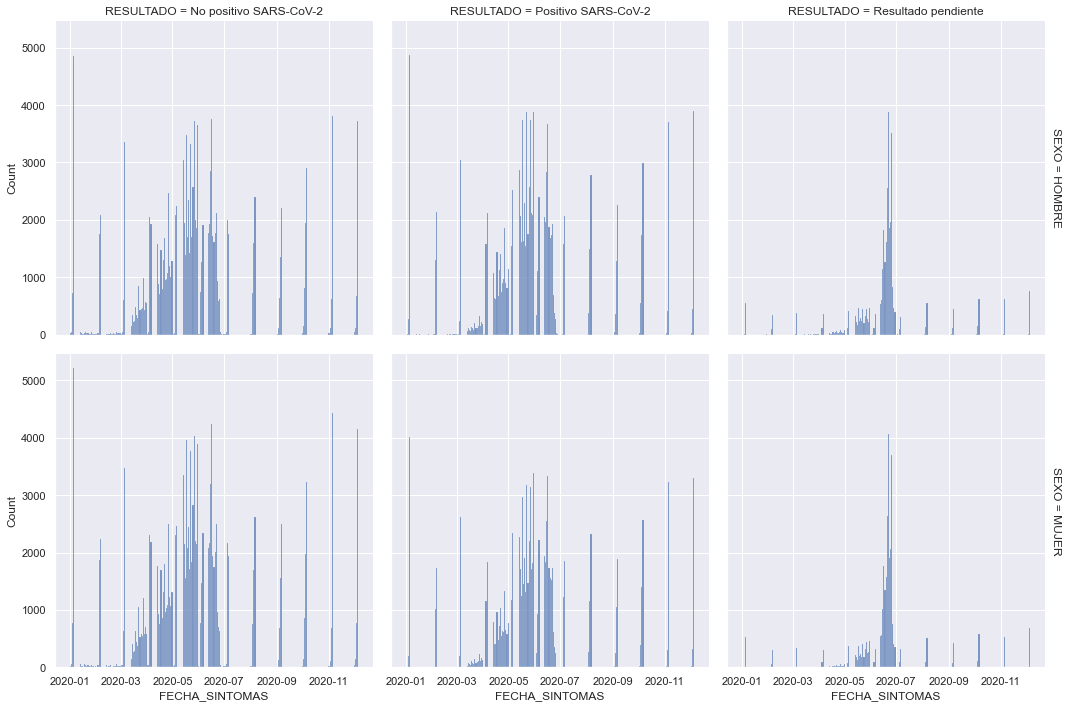

In [30]:
# px.scatter_matrix(casos_temp, dimensions=['Fecha','Confirmados','Negativos','Pendientes','Muertes'], color='Sexo')
sns.set_theme(style="darkgrid")
sns.displot(datos_ac, x = 'FECHA_SINTOMAS', col='RESULTADO', row='SEXO',
             facet_kws=dict(margin_titles=True),
)

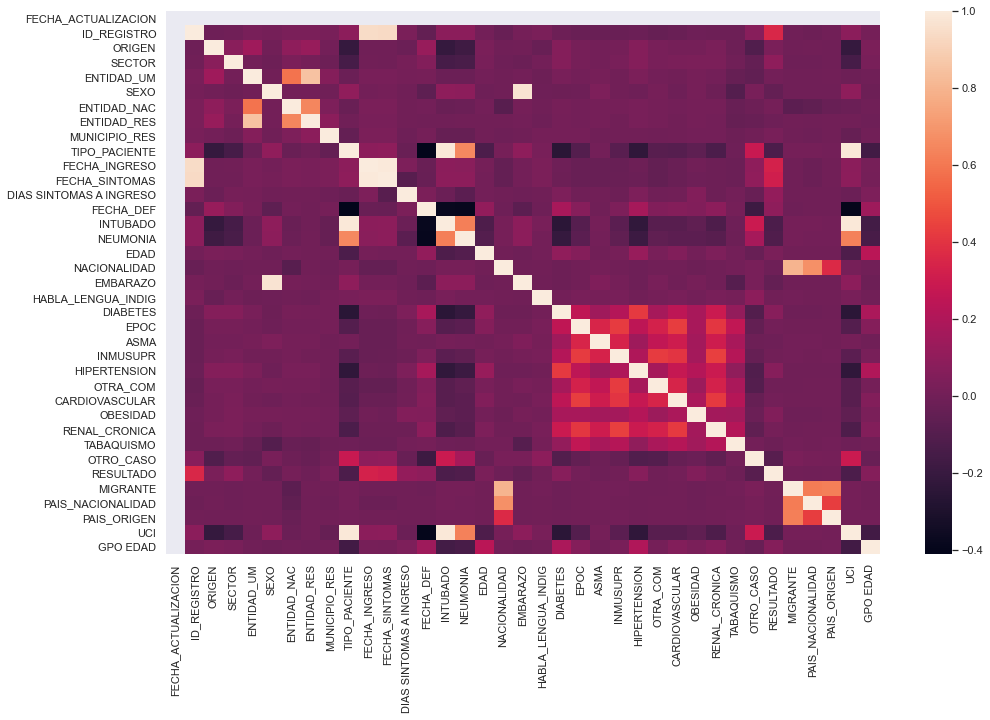

In [31]:
#Heatmap de correlación dataset original
sns.set(rc={'figure.figsize':(16,10)})

sns.heatmap(datos_ac.apply(lambda x: x.factorize()[0]).corr())
plt.show()

<AxesSubplot:xlabel='FECHA_SINTOMAS', ylabel='Count'>

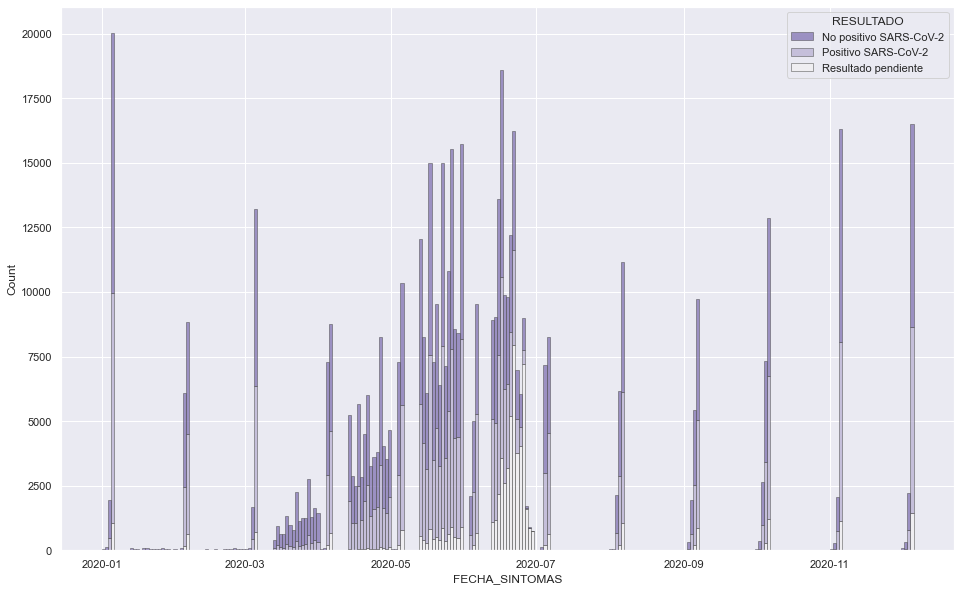

In [32]:
sns.histplot(
    datos_ac,
    x="FECHA_SINTOMAS", hue='RESULTADO',
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)


<AxesSubplot:xlabel='FECHA_INGRESO', ylabel='Count'>

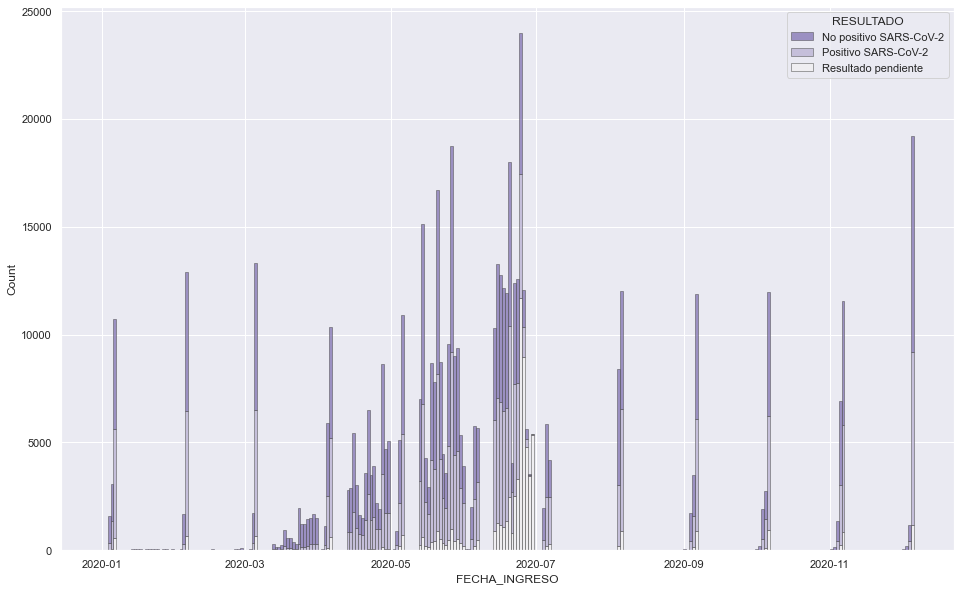

In [33]:
sns.histplot(
    datos_ac,
    x="FECHA_INGRESO", hue='RESULTADO',
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)

<AxesSubplot:xlabel='FECHA_SINTOMAS', ylabel='EDAD'>

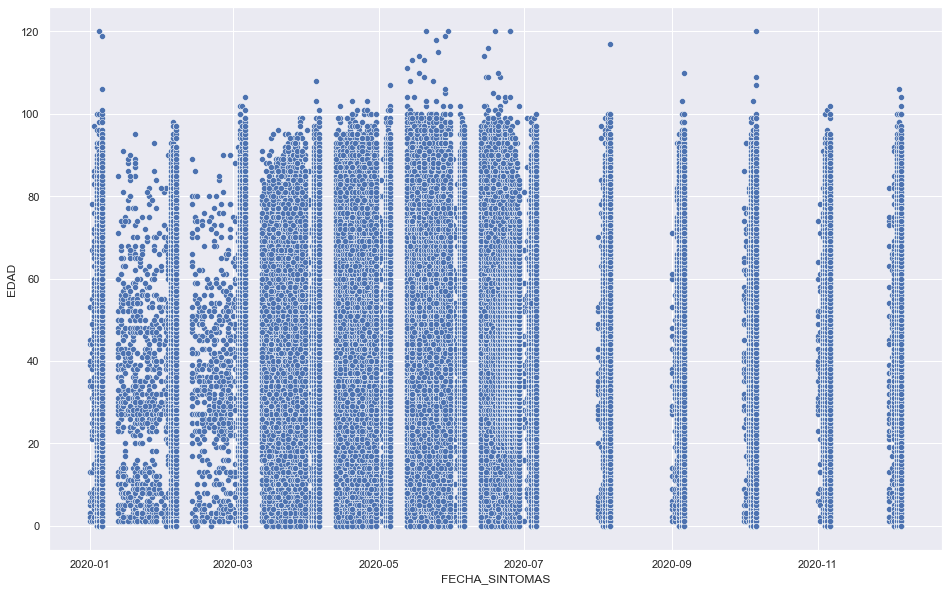

In [34]:
sns.scatterplot(x=datos_ac.FECHA_SINTOMAS, y=datos_ac.EDAD)

<AxesSubplot:xlabel='FECHA_INGRESO', ylabel='EDAD'>

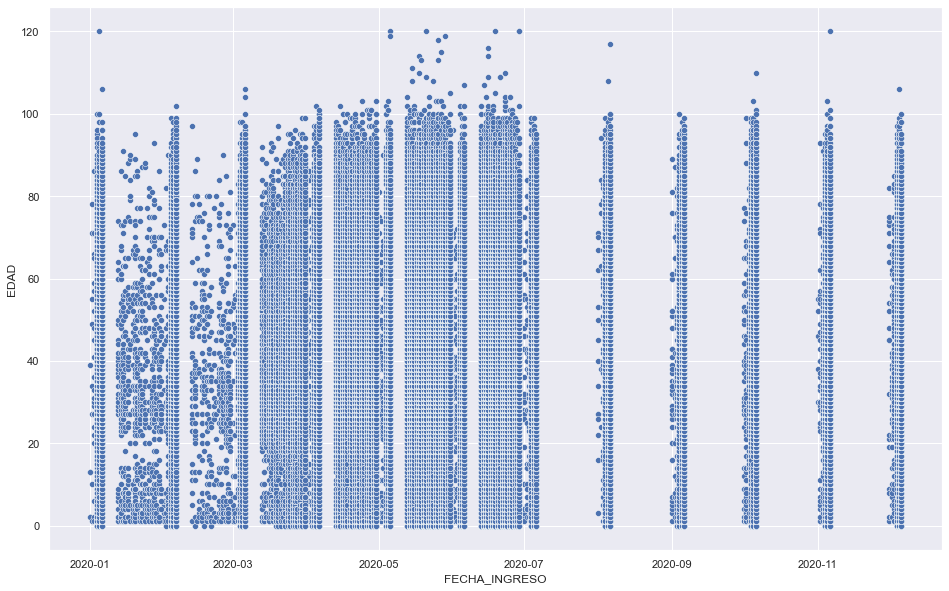

In [35]:
sns.scatterplot(x=datos_ac.FECHA_INGRESO, y=datos_ac.EDAD)

<AxesSubplot:xlabel='Fecha', ylabel='Muertes'>

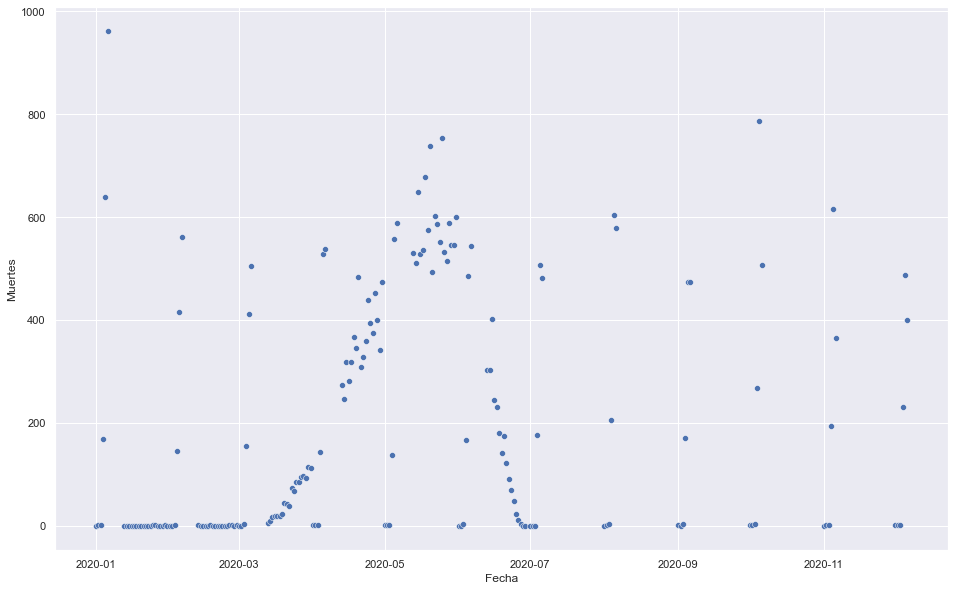

In [42]:
sns.scatterplot(x=Total_casos_dt.index, y=Total_casos_dt.Muertes)

<AxesSubplot:xlabel='SEXO', ylabel='ENTIDAD_UM'>

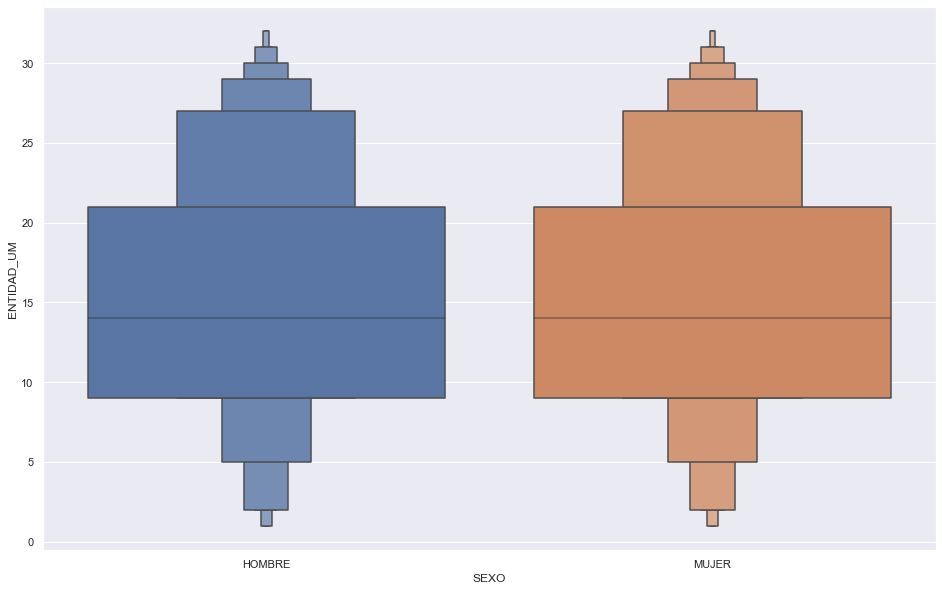

In [36]:
sns.boxenplot(x=datos_ac.SEXO, y=datos_ac.ENTIDAD_UM)

<AxesSubplot:xlabel='SEXO', ylabel='EDAD'>

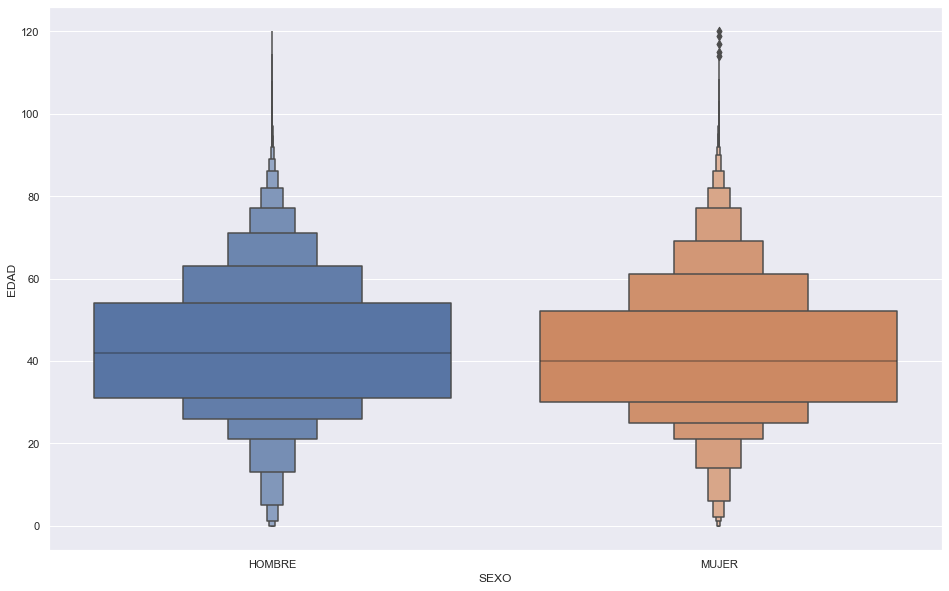

In [37]:
sns.boxenplot(x=datos_ac.SEXO, y=datos_ac.EDAD)